# Getting saturation point example

- We are going to get saturation points.
- Saturation point can be regarded as an elbow point.
- So We are going to get a point which is the farthest from the line of start and end point.
    - https://stackoverflow.com/questions/39840030/distance-between-point-and-a-line-from-two-points

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('./data/W10L5T25.csv')

In [3]:
data.head()

,Vds,Vgs,Ids,W,L,T
0,0.1,-20.0,7.510100e-14,10,5,25
1,0.1,-19.8,7.510100e-14,10,5,25
2,0.1,-19.6,7.510100e-14,10,5,25
3,0.1,-19.4,7.510100e-14,10,5,25
4,0.1,-19.2,7.510100e-14,10,5,25


In [23]:
data.shape

(1206, 6)

In [5]:
data_part = data[['Ids','Vds','Vgs']]

In [7]:
data_part.head()

,Ids,Vds,Vgs
0,7.510100e-14,0.1,-20.0
1,7.510100e-14,0.1,-19.8
2,7.510100e-14,0.1,-19.6
3,7.510100e-14,0.1,-19.4
4,7.510100e-14,0.1,-19.2


In [15]:
data_part['Vgs'].unique()

201

In [16]:
Vgs_arr = data_part['Vgs'].unique()

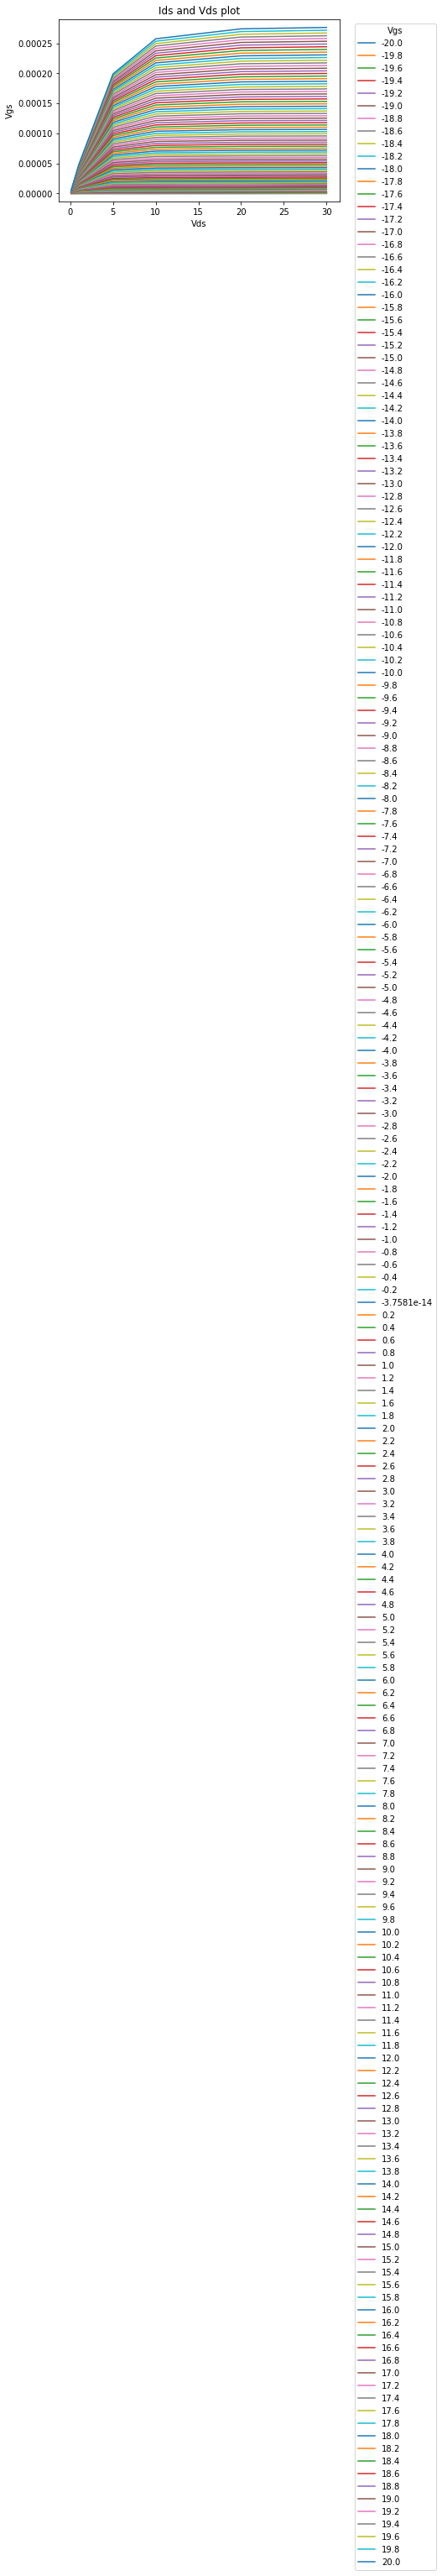

In [94]:
for i in Vgs_arr:
    plt.plot(data_part.query('Vgs=='+str(i))['Vds'], data_part.query('Vgs=='+str(i))['Ids'] , label = i)
    plt.xlabel('Vds')
    plt.ylabel('Vgs')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", title = 'Vgs')
    plt.title('Ids and Vds plot')

In [74]:
saturation_point_dict = {}

for i in Vgs_arr:
    data_part_vgs = data_part.query('Vgs=='+str(i))
    p1 = data_part_vgs.query('Vds==0.1')[['Ids','Vds']].values
    p2 = data_part_vgs.query('Vds==30')[['Ids','Vds']].values

    max_dist = -99
    for j in data_part_vgs['Vds'].unique():
        p3 = data_part_vgs.query('Vds=='+str(j))[['Ids','Vds']].values
        current_dist = np.linalg.norm(np.cross(p2-p1, p1-p3))/np.linalg.norm(p2-p1) 
        ##refer to https://stackoverflow.com/questions/39840030/distance-between-point-and-a-line-from-two-points
        
        if current_dist > max_dist:
            max_dist = current_dist
            elbow_point = j
            
    saturation_point_dict[i] = elbow_point


# Check whether we got correct saturation points

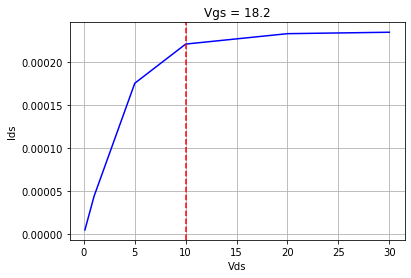

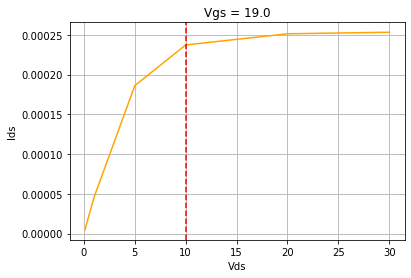

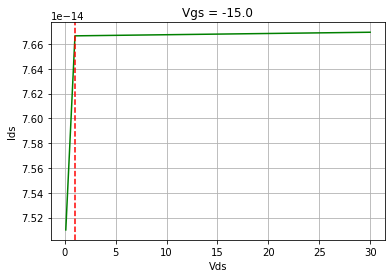

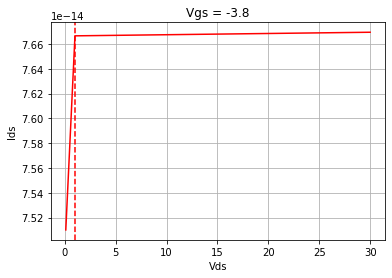

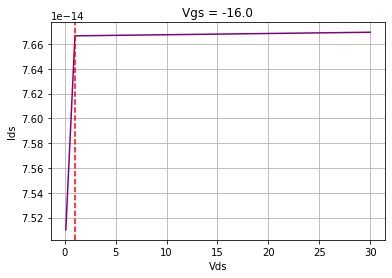

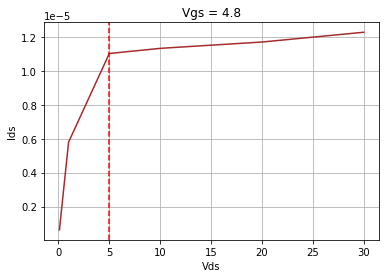

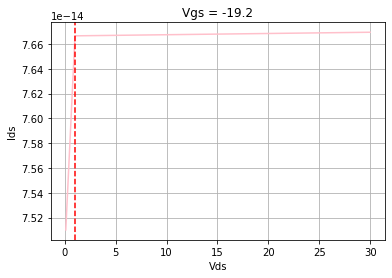

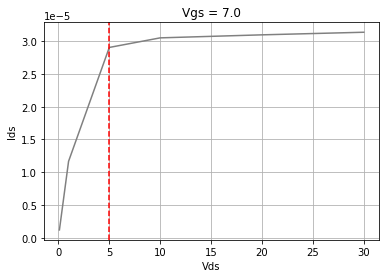

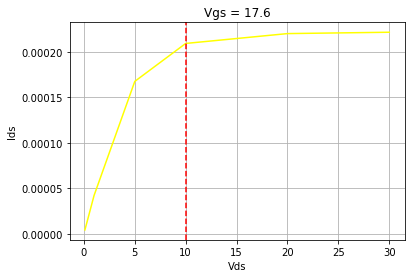

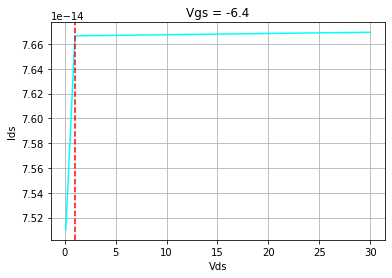

In [88]:
color_ls = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow', 'cyan']

for i in range(10):
    testing_vgs = np.random.choice(Vgs_arr)
    plt.plot(data_part.query('Vgs=='+str(testing_vgs))['Vds'], data_part.query('Vgs=='+str(testing_vgs))['Ids'], color=color_ls[i])
    plt.axvline(saturation_point_dict[testing_vgs], color='red', linestyle='--') ## Check whether we got correct saturation point.
    plt.xlabel('Vds')
    plt.ylabel('Ids')
    plt.title('Vgs = '+ str(testing_vgs))
    plt.grid()
    plt.show()

In [107]:
data['saturation_point'] = np.nan

for i in range(data.shape[0]):
    data.iloc[i,6] = saturation_point_dict[data.iloc[i,1]]

In [108]:
data.head()

,Vds,Vgs,Ids,W,L,T,saturation_point
0,0.1,-20.0,7.510100e-14,10,5,25,1.0
1,0.1,-19.8,7.510100e-14,10,5,25,1.0
2,0.1,-19.6,7.510100e-14,10,5,25,1.0
3,0.1,-19.4,7.510100e-14,10,5,25,1.0
4,0.1,-19.2,7.510100e-14,10,5,25,1.0


In [109]:
data.tail()

,Vds,Vgs,Ids,W,L,T,saturation_point
1201,30.0,19.2,0.000258,10,5,25,10.0
1202,30.0,19.4,0.000262,10,5,25,10.0
1203,30.0,19.6,0.000267,10,5,25,10.0
1204,30.0,19.8,0.000272,10,5,25,10.0
1205,30.0,20.0,0.000276,10,5,25,10.0


In [112]:
data.to_csv('W10L5T25_with_saturation_point.csv', index=False)

# Let's append saturation points to data.

In [121]:
import glob
import os

In [155]:
data_ls = glob.glob('./data/*.csv')
os.mkdir('./data_with_saturation_points')

In [157]:
for i in data_ls:
    
    data = pd.read_csv(i)
    data_part = data[['Ids','Vds','Vgs']]
    Vgs_arr = data_part['Vgs'].unique()
    data['saturation_point'] = np.nan

    saturation_point_dict = {}

    for k in Vgs_arr:
        data_part_vgs = data_part.query('Vgs=='+str(k))
        p1 = data_part_vgs.query('Vds==0.1')[['Ids','Vds']].values
        p2 = data_part_vgs.query('Vds==30')[['Ids','Vds']].values

        max_dist = -99
        for j in data_part_vgs['Vds'].unique():
            p3 = data_part_vgs.query('Vds=='+str(j))[['Ids','Vds']].values
            current_dist = np.linalg.norm(np.cross(p2-p1, p1-p3))/np.linalg.norm(p2-p1) 
            ##refer to https://stackoverflow.com/questions/39840030/distance-between-point-and-a-line-from-two-points

            if current_dist > max_dist:
                max_dist = current_dist
                elbow_point = j

        saturation_point_dict[k] = elbow_point
        
    for w in range(data.shape[0]):
        data.iloc[w,6] = saturation_point_dict[data.iloc[w,1]]
        
        
    data.to_csv('./data_with_saturation_points/'+i.split('/')[-1][:-4]+'_with_saturation_point.csv', index=False)

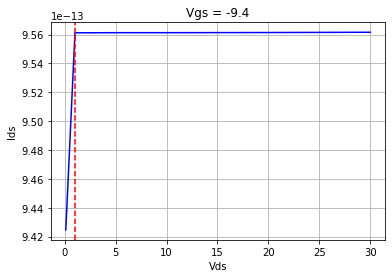

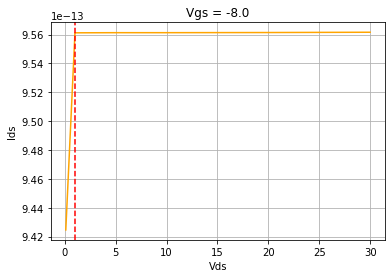

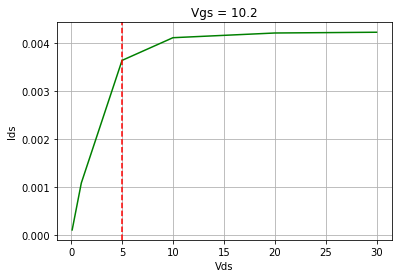

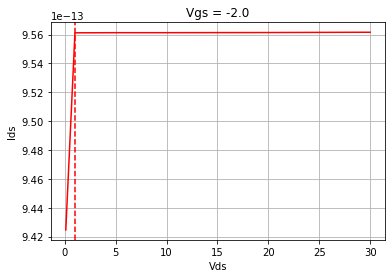

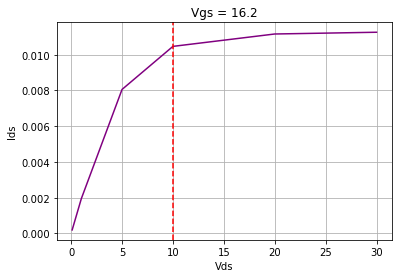

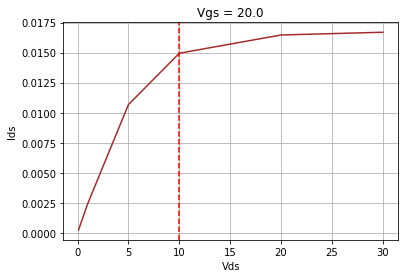

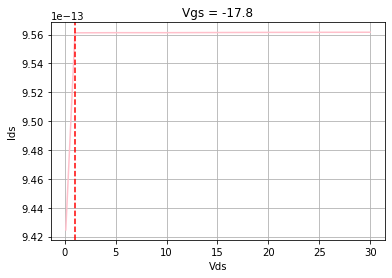

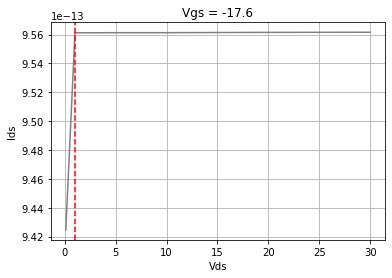

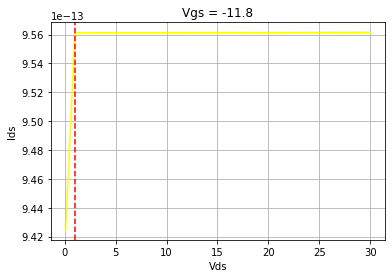

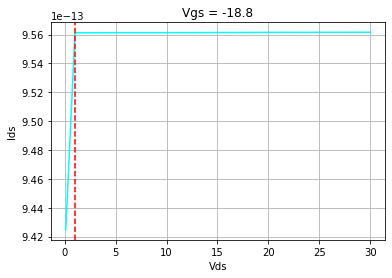

In [161]:
color_ls = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow', 'cyan']

for i in range(10):
    testing_vgs = np.random.choice(Vgs_arr)
    plt.plot(data.query('Vgs=='+str(testing_vgs))['Vds'], data.query('Vgs=='+str(testing_vgs))['Ids'], color=color_ls[i])
    plt.axvline(saturation_point_dict[testing_vgs], color='red', linestyle='--') ## Check whether we got correct saturation point.
    plt.xlabel('Vds')
    plt.ylabel('Ids')
    plt.title('Vgs = '+ str(testing_vgs))
    plt.grid()
    plt.show()

# End